## Producing West African Maps of AGBD with GEDI
This final notebook produces the csv files provided for GEDI AGBD estimation for the 15 West African countries. This takes the models from notebook 2, and the subset GEDI height data from notebook 3, and applies the models to the data. CSV files are written out combining the input data (height metrics etc.) and predicted agbd.

This resource was developed through the project “Global Transformation of Forests for People and Climate: A Focus on West Africa”; implemented by the Food and Agriculture Organization of the United Nations in partnership with the Economic Community of West African States, the University of Maryland, the University of Oxford, the  Forestry Research Institute of Ghana (FORIG)]; and with financial support from the Swedish International Development Cooperation Agency. 

**Notebook authors:**

Veronika Leitold, Geographical Sciences, University of Maryland (vleitold@umd.edu)

Dr. Laura Duncanson, Geographical Sciences, University of Maryland (lduncans@umd.edu)

Notebooks were developed at the University of Maryland, College Park, through expansion of existing NASA Global Ecosystem Dynamics Investigation (GEDI) mission activities.


#### Load necessary R packages

In [21]:
library(sp)
library(rgdal)
library(sf)
library(tidyverse)
library(raster)
library(tidyr)
library(dplyr)
library(terra)
library(ggplot2)

terra 1.7.78


Attaching package: ‘terra’


The following object is masked from ‘package:tidyr’:

    extract


The following object is masked from ‘package:rgdal’:

    project




#### Set file paths and read in GEDI L2A and L4A subsets generated in previous notebook

In [2]:
## set file paths to read and write data
f.path.read <- "/projects/shared-buckets/leitoldv/FAO_WestAfrica/DATA/"
f.path.write <- "/projects/my-public-bucket/FAO_WestAfrica/DATA/"

In [3]:
## select input country by iso3 country code
country <- "GHA"

In [4]:
## load GEDI L2A data subset from .gpkg file
L2A_original <- data.frame(st_read(paste(f.path.read, country, "_L2A.gpkg", sep=""), int64_as_string = TRUE))
nrow(L2A_original)
head(L2A_original)

Reading layer `GHA_L2A' from data source 
  `/projects/shared-buckets/leitoldv/FAO_WestAfrica/DATA/GHA_L2A.gpkg' 
  using driver `GPKG'
Simple feature collection with 12710310 features and 16 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -3.262099 ymin: 4.737483 xmax: 1.187257 ymax: 11.1623
Geodetic CRS:  WGS 84


[1] 12710310

,filename,geolocation.sensitivity_a2,lon_lowestmode,rh60,rh50,rh10,rh70,rh80,rh90,rh98,rh30,rh20,lat_lowestmode,land_cover_data.pft_class,shot_number,rh40,geom
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<POINT [°]>
1,GEDI02_A_2019145020819_O02535_03_T03384_02_003_01_V002.h5>,0.9001988,-1.4725509,0.29,0.00,-1.46,0.63,0.97,1.49,2.17,-0.59,-0.93,7.605792,4,25350100300217508,-0.26,POINT (-1.472551 7.605792)
2,GEDI02_A_2019145020819_O02535_03_T03384_02_003_01_V002.h5>,0.9039373,-1.4746581,2.39,1.34,-1.01,4.15,5.09,5.99,6.81,0.14,-0.37,7.608706,4,25350100300217501,0.71,POINT (-1.474658 7.608706)
3,GEDI02_A_2019145020819_O02535_03_T03384_02_003_01_V002.h5>,0.9071814,-1.4770703,0.56,0.18,-1.61,1.01,1.46,2.02,2.69,-0.56,-1.01,7.612041,4,25350100300217494,-0.18,POINT (-1.47707 7.612041)
4,GEDI02_A_2019145020819_O02535_03_T03384_02_003_01_V002.h5>,0.8671178,-0.8335034,-0.03,-0.33,-2.20,0.22,0.48,0.82,1.19,-1.01,-1.53,6.712111,2,25350200300221441,-0.63,POINT (-0.8335034 6.712111)
5,GEDI02_A_2019145020819_O02535_03_T03384_02_003_01_V002.h5>,0.9162581,-1.2140432,6.92,5.99,0.00,7.97,9.13,10.33,11.60,3.78,2.20,7.241237,4,25350200300220185,4.86,POINT (-1.214043 7.241237)
6,GEDI02_A_2019145020819_O02535_03_T03384_02_003_01_V002.h5>,0.9058289,-1.2364093,0.97,0.52,-1.16,1.46,1.98,2.65,3.37,-0.26,-0.63,7.272248,4,25350200300220112,0.14,POINT (-1.236409 7.272248)


In [5]:
## load GEDI L4A data subset from .gpkg file
L4A_original <- data.frame(st_read(paste(f.path.read, country, "_L4A.gpkg", sep=""), int64_as_string = TRUE))
nrow(L4A_original)
head(L4A_original)

Reading layer `GHA_L4A' from data source 
  `/projects/shared-buckets/leitoldv/FAO_WestAfrica/DATA/GHA_L4A.gpkg' 
  using driver `GPKG'
Simple feature collection with 5133308 features and 11 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -3.261797 ymin: 4.7406 xmax: 1.169516 ymax: 11.1623
Geodetic CRS:  WGS 84


[1] 5133308

,filename,shot_number,sensitivity,elev_lowestmode,agbd_t,agbd,lat_lowestmode,agbd_t_se,lon_lowestmode,agbd_se,geolocation.sensitivity_a2,geom
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<POINT [°]>
1,GEDI04_A_2019161091940_O02788_02_T04831_02_002_02_V002.h5>,27880100200084022,0.9700914,179.9109,1.066535,1.271942,10.599536,1.639515,-1.566497,3.005720,0.9874069,POINT (-1.566497 10.59954)
2,GEDI04_A_2019161091940_O02788_02_T04831_02_002_02_V002.h5>,27880300200083979,0.9595581,179.7235,1.250373,1.748223,10.593589,1.638833,-1.557242,3.003217,0.9833475,POINT (-1.557242 10.59359)
3,GEDI04_A_2019161091940_O02788_02_T04831_02_002_02_V002.h5>,27880500200082205,0.9541013,337.3392,4.556574,23.216370,9.822407,1.632980,-2.118622,2.981805,0.9790177,POINT (-2.118622 9.822407)
4,GEDI04_A_2019161091940_O02788_02_T04831_02_002_02_V002.h5>,27880500200082206,0.9548713,342.1634,6.798649,51.684784,9.822823,1.635969,-2.118313,2.992729,0.9794869,POINT (-2.118313 9.822823)
5,GEDI04_A_2019161091940_O02788_02_T04831_02_002_02_V002.h5>,27880500200082207,0.9628024,349.3831,4.824811,26.030239,9.823238,1.633041,-2.118004,2.982029,0.9856009,POINT (-2.118004 9.823238)
6,GEDI04_A_2019161091940_O02788_02_T04831_02_002_02_V002.h5>,27880500200082209,0.9530507,358.3917,6.534441,47.745716,9.824069,1.635325,-2.117386,2.990373,0.9843502,POINT (-2.117386 9.824069)


## Filter GEDI L2A data
#### Merge all original L4A footprints with corresponding L2A footprints by "shot_number" attribute to create filtered subset of L2A data

In [6]:
L2A_filtered_M <- merge(L4A_original, L2A_original, by = "shot_number", all.x = TRUE)
nrow(L2A_filtered_M)

[1] 5133308

In [7]:
## adjust column names of filtered dataset
xtable <- L2A_filtered_M[, c("filename.x","shot_number","lon_lowestmode.x","lat_lowestmode.x","elev_lowestmode",
                             "rh10","rh20","rh30","rh40","rh50","rh60","rh70","rh80","rh90","rh98",
                             "agbd","agbd_se","land_cover_data.pft_class","geolocation.sensitivity_a2.x")]

colnames(xtable) <- c("filename","shot_number","lon_lowestmode","lat_lowestmode","elev_lowestmode",
                      "RH_10","RH_20","RH_30","RH_40","RH_50","RH_60","RH_70","RH_80","RH_90","RH_98",
                      "agbd","agbd_se","pft_class","sensitivity")

### Save filtered L2A dataset to .csv file

In [8]:
write.csv(xtable, paste(f.path.write, country, "_L2A_filtered_M.csv", sep=""),
          row.names=FALSE)

## **Apply the L4A biomass models to the filtered L2A dataset to generate new biomass estimates**

#### Three different L4A biomass models were developed corresponding to the three different Plant Functional Types (PFTs) present in Ghana and the rest of the West-African countries. These are:

> **DBT**: Deciduous Broadleaf Froests (MODIS class 4)

> **EBT**: Evergreen Broadleaf Forests (MODIS class 2)

> **GS**: Grasslands & Shrublands (MODIS class 5, 6, 7 and 8)

#### Below, we apply the three different L4A models separately to the different PFT classes within Ghana and output new biomass estimates within each PFT class.

#### Set file paths and read in filtered GEDI L2A data

In [9]:
l4a_models_path <- "/projects/shared-buckets/leitoldv/FAO_WestAfrica/MODELS/"

f.path.read <- "/projects/shared-buckets/leitoldv/FAO_WestAfrica/DATA/"
f.path.write <- "/projects/my-public-bucket/FAO_WestAfrica/DATA/"

L2A_filtered_M <- read.csv(paste(f.path.read, country, "_L2A_filtered_M.csv", sep=""))
nrow(L2A_filtered_M)
head(L2A_filtered_M)

[1] 5133308

,filename,shot_number,lon_lowestmode,lat_lowestmode,elev_lowestmode,RH_10,RH_20,RH_30,RH_40,RH_50,RH_60,RH_70,RH_80,RH_90,RH_98,agbd,agbd_se,pft_class,sensitivity
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,GEDI04_A_2020263024613_O10026_03_T10453_02_002_02_V002.h5>,1.002605e+17,-1.842684,10.97760,337.9273,-2.39,-1.57,-1.01,-0.59,-0.18,0.22,0.59,1.08,1.68,2.73,1.391625,3.005038,6,0.9815226
2,GEDI04_A_2020263024613_O10026_03_T10453_02_002_02_V002.h5>,1.002605e+17,-1.842064,10.97677,337.0350,-2.39,-1.57,-1.01,-0.59,-0.18,0.18,0.59,1.04,1.64,2.69,1.331117,3.005378,6,0.9876935
3,GEDI04_A_2020263024613_O10026_03_T10453_02_002_02_V002.h5>,1.002605e+17,-1.839579,10.97344,331.5154,-2.35,-1.49,-0.86,-0.37,0.11,0.63,1.23,2.02,3.51,5.87,10.238476,2.986159,6,0.9793556
4,GEDI04_A_2020263024613_O10026_03_T10453_02_002_02_V002.h5>,1.002605e+17,-1.835848,10.96846,320.6641,-2.54,-1.68,-1.12,-0.63,-0.22,0.18,0.59,1.12,1.75,2.88,1.630395,3.003788,6,0.9783296
5,GEDI04_A_2020263024613_O10026_03_T10453_02_002_02_V002.h5>,1.002605e+17,-1.834294,10.96638,314.2594,-2.58,-1.75,-1.16,-0.71,-0.29,0.11,0.56,1.01,1.64,2.65,1.271942,3.005720,6,0.9824807
6,GEDI04_A_2020263024613_O10026_03_T10453_02_002_02_V002.h5>,1.002605e+17,-1.833984,10.96596,312.6764,-2.65,-1.72,-1.16,-0.67,-0.26,0.14,0.56,1.04,1.68,2.69,1.331117,3.005378,6,0.9902381


### Apply DBT model to generate new L4A estimates
To apply a model to on orbit data, a few important steps are necessary. Following this code will enable this. 

In [13]:
## define input model name
l4a_model_no1 <- "predict_DBT_Af_fit_Af_sqrt_sqrt_Snowdon_1.rds"

## set PFT class name and class value
PFT <- "DBT"
PFT_num <- 4

## select PFT-specific subset of L2A filtered data
xtable <- L2A_filtered_M[L2A_filtered_M$pft_class == PFT_num, ]
nrow(xtable)

# adjust for offset in model fits
# (note: GEDI L4A team added offset to all height metrics so they would never be negative)
xtable_sqrt <- xtable[,c("RH_10","RH_20","RH_30","RH_40","RH_50",
                         "RH_60","RH_70","RH_80","RH_90","RH_98")] + 100

xtable_sqrt$AGBD <- NA
xtable_sqrt$SE <- NA

# read in L4A model from .rds file
model_in <- readRDS(paste(l4a_models_path, l4a_model_no1, sep=""))

# get variance covariance matrix
model_varcov <- vcov(model_in)

# get coefficients
coeffs <- model_in$coefficients

# SE
xtable_sqrt$SE <- summary(model_in)$sigma^2

# AGB prediction
xtable_sqrt$AGBD <- predict(model_in, newdata=xtable_sqrt)

# define C - C corrects for any bias in the back transformation of biomass from square root or log space to AGBD space.
C <- mean(model_in$fitted.values^2)/mean(model_in$model$`sqrt(AGBD)`^2)

# set negatives to zero because we do not want them to become positive predictions when backtransformed
negs <- which(xtable_sqrt$AGBD < 0)
if(length(negs) > 0){
  xtable_sqrt$AGBD[negs] == 0.0
}

# multiply by C in case there is a systematic over or under estimation in the model (bias correction)
xtable_sqrt$AGBD <- C*(xtable_sqrt$AGBD^2)

# create output table with new AGBD and SE columns
xtable_out <- cbind(xtable, xtable_sqrt$AGBD, xtable_sqrt$SE)
ncol <- ncol(xtable_out)
colnames(xtable_out)[(ncol-1):ncol] <- c('AGBD', 'SE')

# save output to .csv file
file_out <- paste(f.path.write, country, "_L4A_", strsplit(l4a_model_no1,".rds"),".csv",sep="")
print(file_out)
write.csv(xtable_out, file=file_out, row.names=FALSE)

[1] 429032

[1] FALSE

[1] "/projects/my-public-bucket/FAO_WestAfrica/DATA/GHA_L4A_predict_DBT_Af_fit_Af_sqrt_sqrt_Snowdon_1.csv"


### Apply EBT-specific model to generate new L4A estimates
This is actually the same as the DBT model in this example, but in future examples in other regions or countries there will often be separate models for each PFT.

In [14]:
## define input model name
l4a_model_no1 <- "predict_EBT_Af_fit_Af_sqrt_sqrt_Snowdon_1.rds"

## set PFT class name and class value
PFT <- "EBT"
PFT_num <- 2

## select PFT-specific subset of L2A filtered data
xtable <- L2A_filtered_M[L2A_filtered_M$pft_class == PFT_num, ]
nrow(xtable)

# adjust for offset in model fits
# (note: GEDI L4A team added offset to all height metrics so they would never be negative)
xtable_sqrt <- xtable[,c("RH_10","RH_20","RH_30","RH_40","RH_50",
                         "RH_60","RH_70","RH_80","RH_90","RH_98")] + 100

xtable_sqrt$AGBD <- NA
xtable_sqrt$SE <- NA

# read in L4A model from .rds file
model_in <- readRDS(paste(l4a_models_path, l4a_model_no1, sep=""))

# get variance covariance matrix
model_varcov <- vcov(model_in)

# get coefficients
coeffs <- model_in$coefficients

# SE
xtable_sqrt$SE <- summary(model_in)$sigma^2

# AGB prediction
xtable_sqrt$AGBD <- predict(model_in, newdata=xtable_sqrt)

# define C
C <- mean(model_in$fitted.values^2)/mean(model_in$model$`sqrt(AGBD)`^2)

# set negatives to zero
negs <- which(xtable_sqrt$AGBD < 0)
if(length(negs) > 0){
  xtable_sqrt$AGBD[negs] == 0.0
}

# multiply by C in case there is a systematic over or under estimation in the model (bias correction)
xtable_sqrt$AGBD <- C*(xtable_sqrt$AGBD^2)

# create output table with new AGBD and SE columns
xtable_out <- cbind(xtable, xtable_sqrt$AGBD, xtable_sqrt$SE)
ncol <- ncol(xtable_out)
colnames(xtable_out)[(ncol-1):ncol] <- c('AGBD', 'SE')

# save output to .csv file
file_out <- paste(f.path.write, country, "_L4A_",strsplit(l4a_model_no1,".rds"),".csv",sep="")
print(file_out)
write.csv(xtable_out, file=file_out, row.names=FALSE)

[1] 2543264

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

[1] "/projects/my-public-bucket/FAO_WestAfrica/DATA/GHA_L4A_predict_EBT_Af_fit_Af_sqrt_sqrt_Snowdon_1.csv"


### Apply GS-specific model to generate new L4A estimates

In [15]:
## define input model name
l4a_model_no1 <- "predict_GS_Af_fit_GS_Af_sqrt_sqrt_Snowdon_11.rds"

## set PFT class name and class value
PFT <- "GS"
PFT_num <- c(5,6,7,8)

## select PFT-specific subset of L2A filtered data
xtable <- L2A_filtered_M[L2A_filtered_M$pft_class == PFT_num[1] |
                         L2A_filtered_M$pft_class == PFT_num[2] |
                         L2A_filtered_M$pft_class == PFT_num[3] |
                         L2A_filtered_M$pft_class == PFT_num[4], ]
nrow(xtable)

# adjust for offset in model fits
# (note: GEDI L4A team added offset to all height metrics so they would never be negative)
xtable_sqrt <- xtable[,c("RH_10","RH_20","RH_30","RH_40","RH_50",
                         "RH_60","RH_70","RH_80","RH_90","RH_98")] + 100

xtable_sqrt$AGBD <- NA
xtable_sqrt$SE <- NA

# read in L4A model from .rds file
model_in <- readRDS(paste(l4a_models_path, l4a_model_no1, sep=""))

# get variance covariance matrix
model_varcov <- vcov(model_in)

# get coefficients
coeffs <- model_in$coefficients

# SE
xtable_sqrt$SE <- summary(model_in)$sigma^2

# AGB prediction
xtable_sqrt$AGBD <- predict(model_in, newdata=xtable_sqrt)

# define C
C <- mean(model_in$fitted.values^2)/mean(model_in$model$`sqrt(AGBD)`^2)

# set negatives to zero
negs <- which(xtable_sqrt$AGBD < 0)
if(length(negs) > 0){
  xtable_sqrt$AGBD[negs] == 0.0
}

# multiply by C in case there is a systematic over or under estimation in the model (bias correction)
xtable_sqrt$AGBD <- C*(xtable_sqrt$AGBD^2)

# create output table with new AGBD and SE columns
xtable_out <- cbind(xtable, xtable_sqrt$AGBD, xtable_sqrt$SE)
ncol <- ncol(xtable_out)
colnames(xtable_out)[(ncol-1):ncol] <- c('AGBD', 'SE')

# save output to .csv file
file_out <- paste(f.path.write, country, "_L4A_",strsplit(l4a_model_no1,".rds"),".csv",sep="")
print(file_out)
write.csv(xtable_out, file=file_out, row.names=FALSE)

[1] 2149268

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE

[1] "/projects/my-public-bucket/FAO_WestAfrica/DATA/GHA_L4A_predict_GS_Af_fit_GS_Af_sqrt_sqrt_Snowdon_11.csv"


## Compare original L4A data with newly calculated biomass estimates


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-75.29  -0.24   0.51   1.32 363.84 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.9701111  0.0082357  -603.5   <2e-16 ***
x            0.7360619  0.0001392  5288.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.012 on 429030 degrees of freedom
Multiple R-squared:  0.9849,	Adjusted R-squared:  0.9849 
F-statistic: 2.797e+07 on 1 and 429030 DF,  p-value: < 2.2e-16


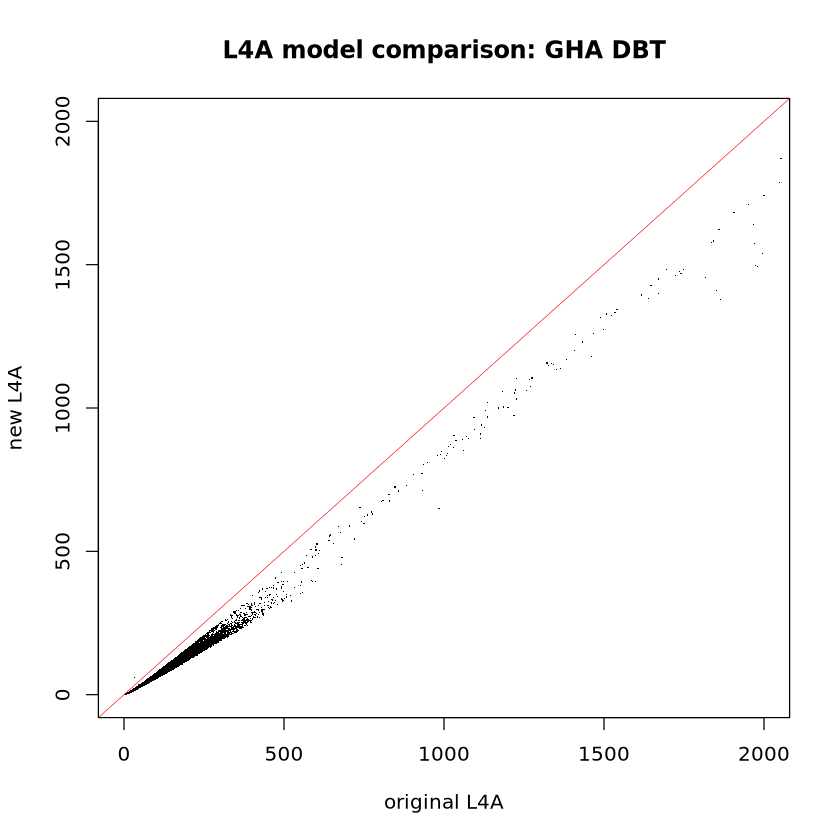

In [18]:
PFT <- "DBT"

f.path.read <- "/projects/shared-buckets/leitoldv/FAO_WestAfrica/DATA/"
l4a_model_no1 <- "predict_DBT_Af_fit_Af_sqrt_sqrt_Snowdon_1.rds"
xtable_out <- read.csv(paste(f.path.read, country, "_L4A_",strsplit(l4a_model_no1,".rds"),".csv",sep=""))

x <- xtable_out$agbd
y <- xtable_out$AGBD
main <- paste("L4A model comparison:", country, PFT, sep=" ")

summary(lm(y ~ x))

plot(x, y, pch=".", xlim=c(0,2000), ylim=c(0,2000), main=main, xlab="original L4A", ylab="new L4A")
abline(a=0, b=1, col="red", lwd=0.5)



Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1613.20   -15.70    -2.83     2.21  2212.91 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.9021060  0.0412124    -216   <2e-16 ***
x            1.1145112  0.0003516    3170   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.84 on 2543262 degrees of freedom
Multiple R-squared:  0.798,	Adjusted R-squared:  0.798 
F-statistic: 1.005e+07 on 1 and 2543262 DF,  p-value: < 2.2e-16


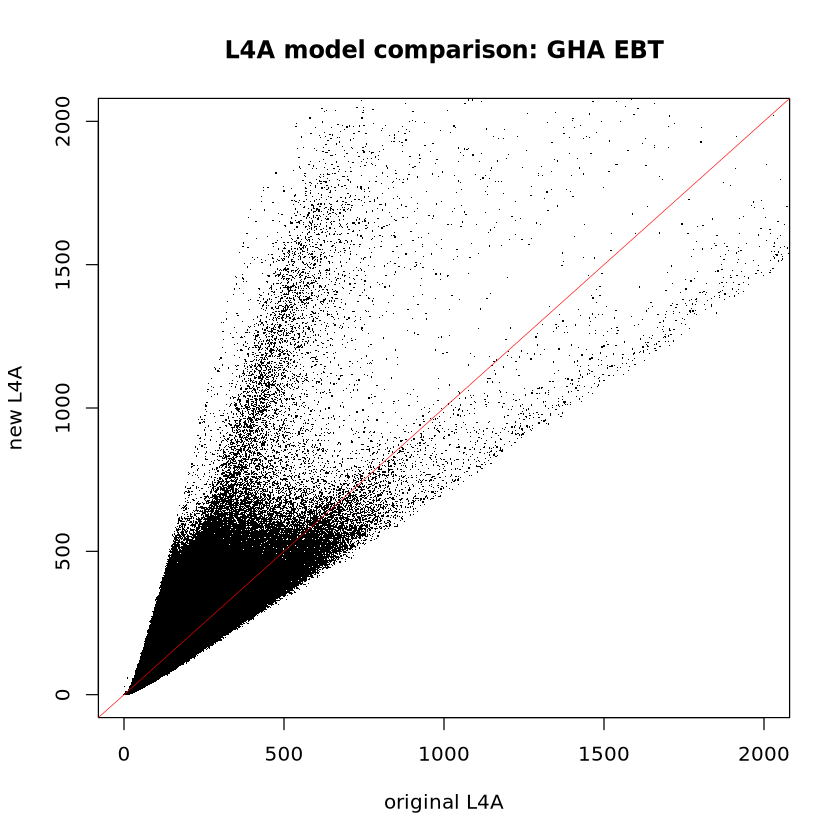

In [19]:
PFT <- "EBT"

f.path.read <- "/projects/shared-buckets/leitoldv/FAO_WestAfrica/DATA/"
l4a_model_no1 <- "predict_EBT_Af_fit_Af_sqrt_sqrt_Snowdon_1.rds"
xtable_out <- read.csv(paste(f.path.read, country, "_L4A_",strsplit(l4a_model_no1,".rds"),".csv",sep=""))

x <- xtable_out$agbd
y <- xtable_out$AGBD
main <- paste("L4A model comparison:", country, PFT, sep=" ")

summary(lm(y ~ x))

plot(x, y, pch=".", xlim=c(0,2000), ylim=c(0,2000), main=main, xlab="original L4A", ylab="new L4A")
abline(a=0, b=1, col="red", lwd=0.5)



Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-13.92  -0.53   0.01   0.63 504.13 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.217e+00  9.891e-04   -1231   <2e-16 ***
x            7.202e-01  3.313e-05   21735   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.278 on 2149266 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9955 
F-statistic: 4.724e+08 on 1 and 2149266 DF,  p-value: < 2.2e-16


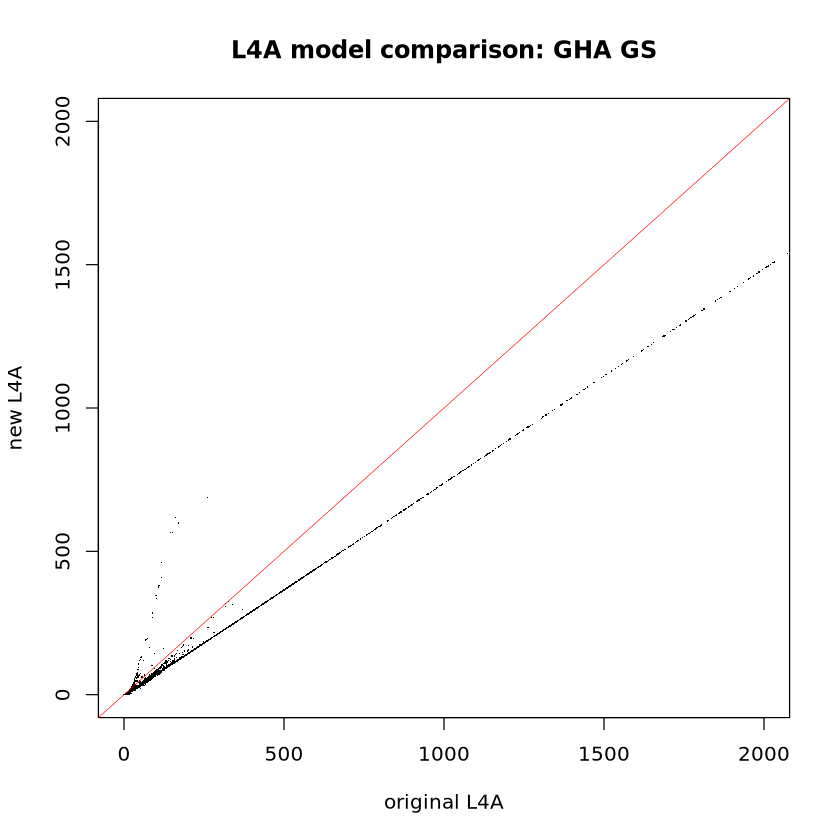

In [20]:
PFT <- "GS"

f.path.read <- "/projects/shared-buckets/leitoldv/FAO_WestAfrica/DATA/"
l4a_model_no1 <- "predict_GS_Af_fit_GS_Af_sqrt_sqrt_Snowdon_11.rds"
xtable_out <- read.csv(paste(f.path.read, country, "_L4A_",strsplit(l4a_model_no1,".rds"),".csv",sep=""))

x <- xtable_out$agbd
y <- xtable_out$AGBD
main <- paste("L4A model comparison:", country, PFT, sep=" ")

summary(lm(y ~ x))

plot(x, y, pch=".", xlim=c(0,2000), ylim=c(0,2000), main=main, xlab="original L4A", ylab="new L4A")
abline(a=0, b=1, col="red", lwd=0.5)


## Visualize new biomass estimates spatially across AOI

In [51]:
## load vector layer of world countries from file (Source: NaturalEarthData.com)
world <- vect("/projects/shared-buckets/leitoldv/NaturalEarth/ne_10m_admin_0_countries.shp")

In [52]:
## select world region ("Africa") and input country ("GHA") for mapping
country <- "GHA"
country_name <- world[world$ADM0_A3==country,]$ADMIN
country_boundary <- world[world$ADM0_A3==country,]
continent <- world[world$CONTINENT=="Africa",]

In [53]:
options(repr.plot.width=10, repr.plot.height=10) ## modify plot size as needed

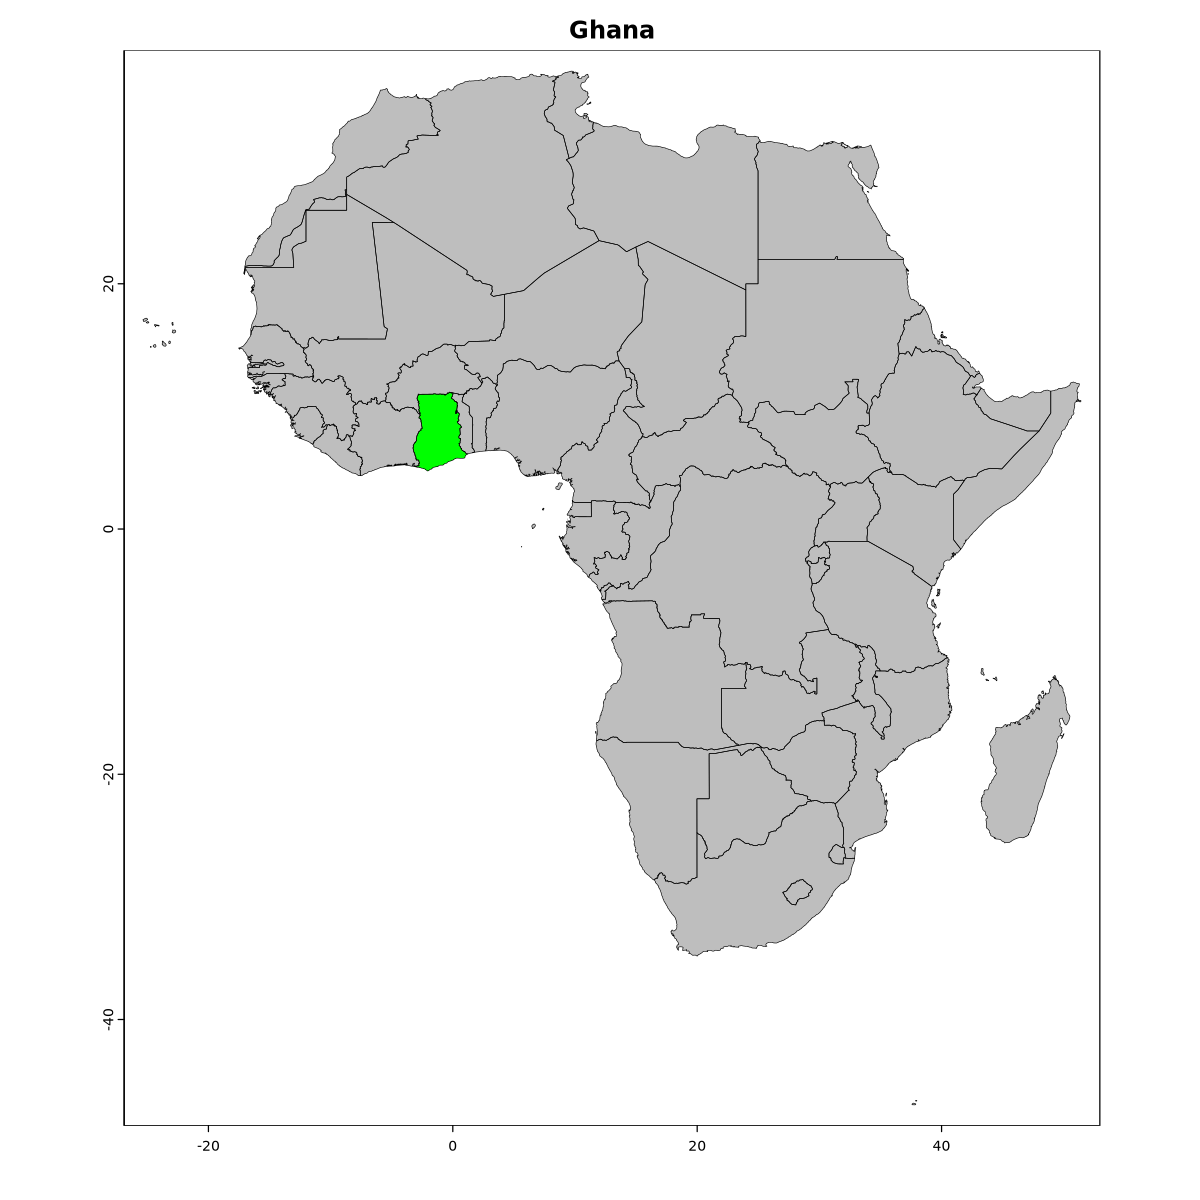

In [54]:
## show map location of the input country
plot(continent, col="gray", border=NA, main=country_name)
plot(country_boundary, col="green", border=NA, add=T)
plot(continent, col=NA, border="black", lwd=0.5, add=T)

In [50]:
## look for L4A files in DATA directory by input country name
f.path <- "/projects/shared-buckets/leitoldv/FAO_WestAfrica/DATA/"
f.names <- list.files(f.path, pattern=paste(country,"_L4A_",sep=""), full.names=FALSE)
f.names

[1] "GHA_L4A_predict_DBT_Af_fit_Af_sqrt_sqrt_Snowdon_1.csv"   
[2] "GHA_L4A_predict_EBT_Af_fit_Af_sqrt_sqrt_Snowdon_1.csv"   
[3] "GHA_L4A_predict_GS_Af_fit_GS_Af_sqrt_sqrt_Snowdon_11.csv"

In [42]:
## read in L4A files from DATA directory
if(length(f.names[grep(f.names, pattern="_EBT_")]) > 0) {
    f.names.EBT  <- f.names[grep(f.names, pattern="_EBT_")] } else {f.names.EBT <- NULL}
if(length(f.names[grep(f.names, pattern="_DBT_")]) > 0) {
    f.names.DBT  <- f.names[grep(f.names, pattern="_DBT_")] } else {f.names.DBT <- NULL}
if(length(f.names[grep(f.names, pattern="_GS_")]) > 0) {
    f.names.GS  <- f.names[grep(f.names, pattern="_GS_")] } else {f.names.GS <- NULL}

if(!is.null(f.names.EBT)){ data.EBT <- read.csv(paste(f.path,f.names.EBT,sep="")) } else {data.EBT <- NULL}
if(!is.null(f.names.DBT)){ data.DBT <- read.csv(paste(f.path,f.names.DBT,sep="")) } else {data.DBT <- NULL}
if(!is.null(f.names.GS)){ data.GS  <- read.csv(paste(f.path,f.names.GS,sep="")) } else {data.GS <- NULL}

## Map L2A canopy height distribution across the country

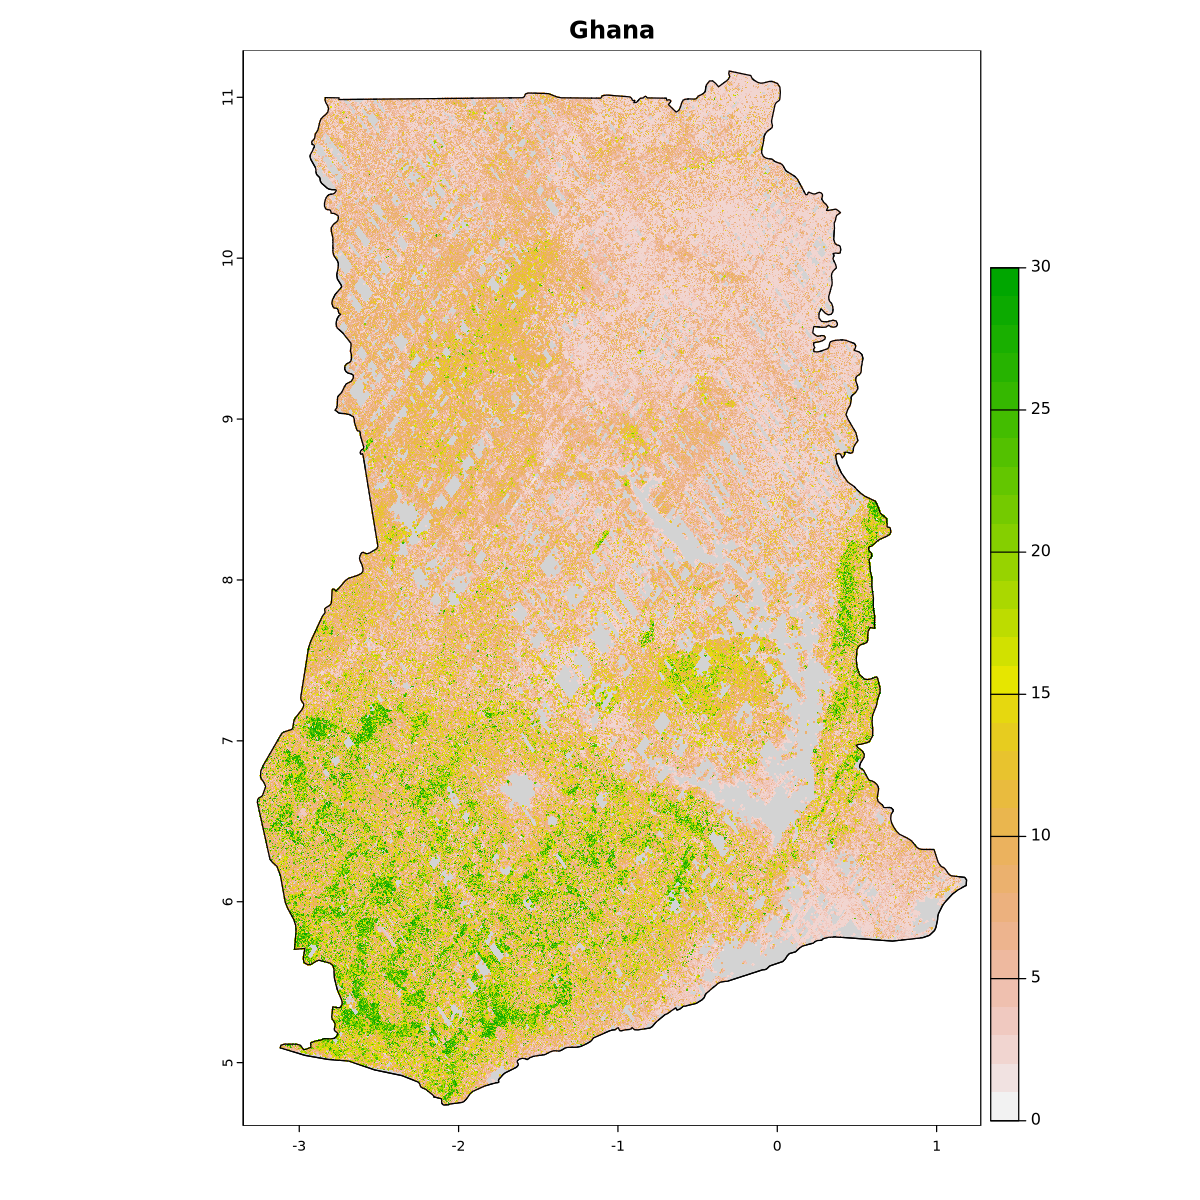

In [70]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,1))

plot(country_boundary, col="lightgray", border="black", main=country_name)

cols <- terrain.colors(30, rev=TRUE)
range <- c(0,30)

if(!is.null(f.names.GS)){
    data.pts <- vect(data.GS, geom=c("lon_lowestmode", "lat_lowestmode"), crs="EPSG:4326")
    plot(data.pts, values=data.pts$RH_98, range=range, cex=0.25, add=TRUE,
     col=cols, type="continuous", legend=FALSE, 
     buffer=TRUE, decreasing=FALSE)
}
if(!is.null(f.names.DBT)){
    data.pts <- vect(data.DBT, geom=c("lon_lowestmode", "lat_lowestmode"), crs="EPSG:4326")
    plot(data.pts, values=data.pts$RH_98, range=range, cex=0.25, add=TRUE,
     col=cols, type="continuous", legend=FALSE, 
     buffer=TRUE, decreasing=FALSE)
} 
if(!is.null(f.names.EBT)){
    data.pts <- vect(data.EBT, geom=c("lon_lowestmode", "lat_lowestmode"), crs="EPSG:4326")
    plot(data.pts, values=data.pts$RH_98, range=range, cex=0.25, add=TRUE,
     col=cols, type="continuous", legend=TRUE, 
     buffer=TRUE, decreasing=FALSE)
}
plot(country_boundary, col=NA, border="black", add=T)

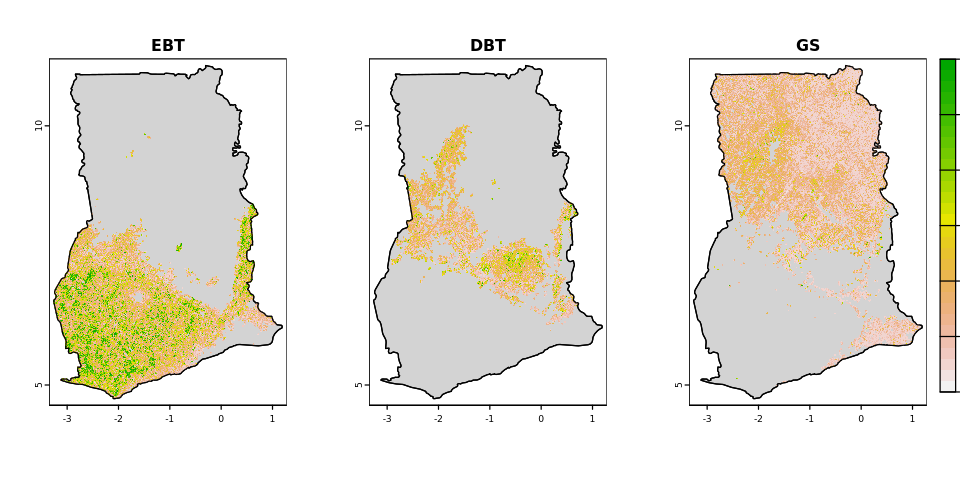

In [71]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1,3))

#cols <- map.pal("greens", n=50)
cols <- terrain.colors(30, rev=TRUE)
range <- c(0,30)

if(!is.null(f.names.EBT)){
plot(country_boundary, col="lightgray", border="black", main="EBT")
    data.pts <- vect(data.EBT, geom=c("lon_lowestmode", "lat_lowestmode"), crs="EPSG:4326")
    plot(data.pts, values=data.pts$RH_98, range=range, cex=0.25, add=TRUE,
     col=cols, type="continuous", legend=FALSE, 
     buffer=TRUE, decreasing=FALSE)
plot(country_boundary, col=NA, border="black", add=T)
}

if(!is.null(f.names.DBT)){
plot(country_boundary, col="lightgray", border="black", main="DBT")
    data.pts <- vect(data.DBT, geom=c("lon_lowestmode", "lat_lowestmode"), crs="EPSG:4326")
    plot(data.pts, values=data.pts$RH_98, range=range, cex=0.25, add=TRUE,
     col=cols, type="continuous", legend=FALSE, 
     buffer=TRUE, decreasing=FALSE)
plot(country_boundary, col=NA, border="black", add=T)
} 

if(!is.null(f.names.GS)){
plot(country_boundary, col="lightgray", border="black", main="GS")
    data.pts <- vect(data.GS, geom=c("lon_lowestmode", "lat_lowestmode"), crs="EPSG:4326")
    plot(data.pts, values=data.pts$RH_98, range=range, cex=0.25, add=TRUE,
     col=cols, type="continuous", legend=TRUE, 
     buffer=TRUE, decreasing=FALSE)
plot(country_boundary, col=NA, border="black", add=T)
}

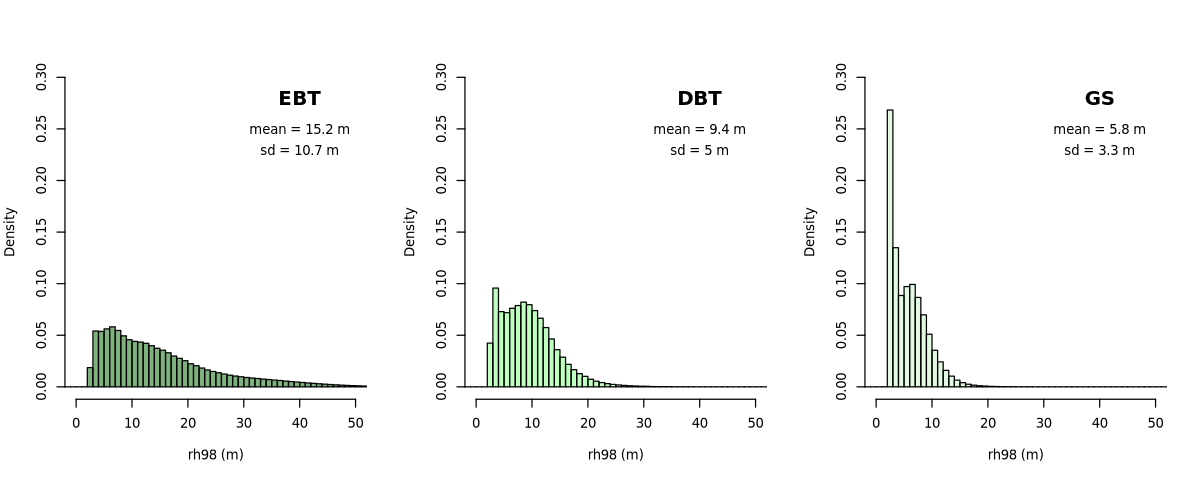

In [72]:
options(repr.plot.width=10, repr.plot.height=4)
par(mfrow=c(1,3))

breaks <- seq(-10,200,1)
xlim <- c(0,50)
ylim <- c(0,0.3)
xlab <- "rh98 (m)"

if(!is.null(data.EBT)){
hist(data.EBT$RH_98, breaks=breaks, freq=F, col=alpha("darkgreen",0.5), xlim=xlim, ylim=ylim, xlab=xlab, main="")
text(40, 0.25, paste("mean = ", round(mean(data.EBT$RH_98),1), " m", sep=""))
text(40, 0.23, paste("sd = ", round(sd(data.EBT$RH_98),1), " m", sep=""))    
text(40, 0.28, "EBT", font=2, cex=1.5)
}
if(!is.null(data.DBT)){
hist(data.DBT$RH_98, breaks=breaks, freq=F, col=alpha("green",0.25), xlim=xlim, ylim=ylim, xlab=xlab, main="")
text(40, 0.25, paste("mean = ", round(mean(data.DBT$RH_98),1), " m", sep=""))
text(40, 0.23, paste("sd = ", round(sd(data.DBT$RH_98),1), " m", sep=""))    
text(40, 0.28, "DBT", font=2, cex=1.5)
}
if(!is.null(data.GS)){
hist(data.GS$RH_98, breaks=breaks, freq=F, col=alpha("lightgreen",0.25), xlim=xlim, ylim=ylim, xlab=xlab, main="")
text(40, 0.25, paste("mean = ", round(mean(data.GS$RH_98),1), " m", sep=""))
text(40, 0.23, paste("sd = ", round(sd(data.GS$RH_98),1), " m", sep=""))    
text(40, 0.28, "GS", font=2, cex=1.5)
}

## Map L4A biomass density distribution across the country

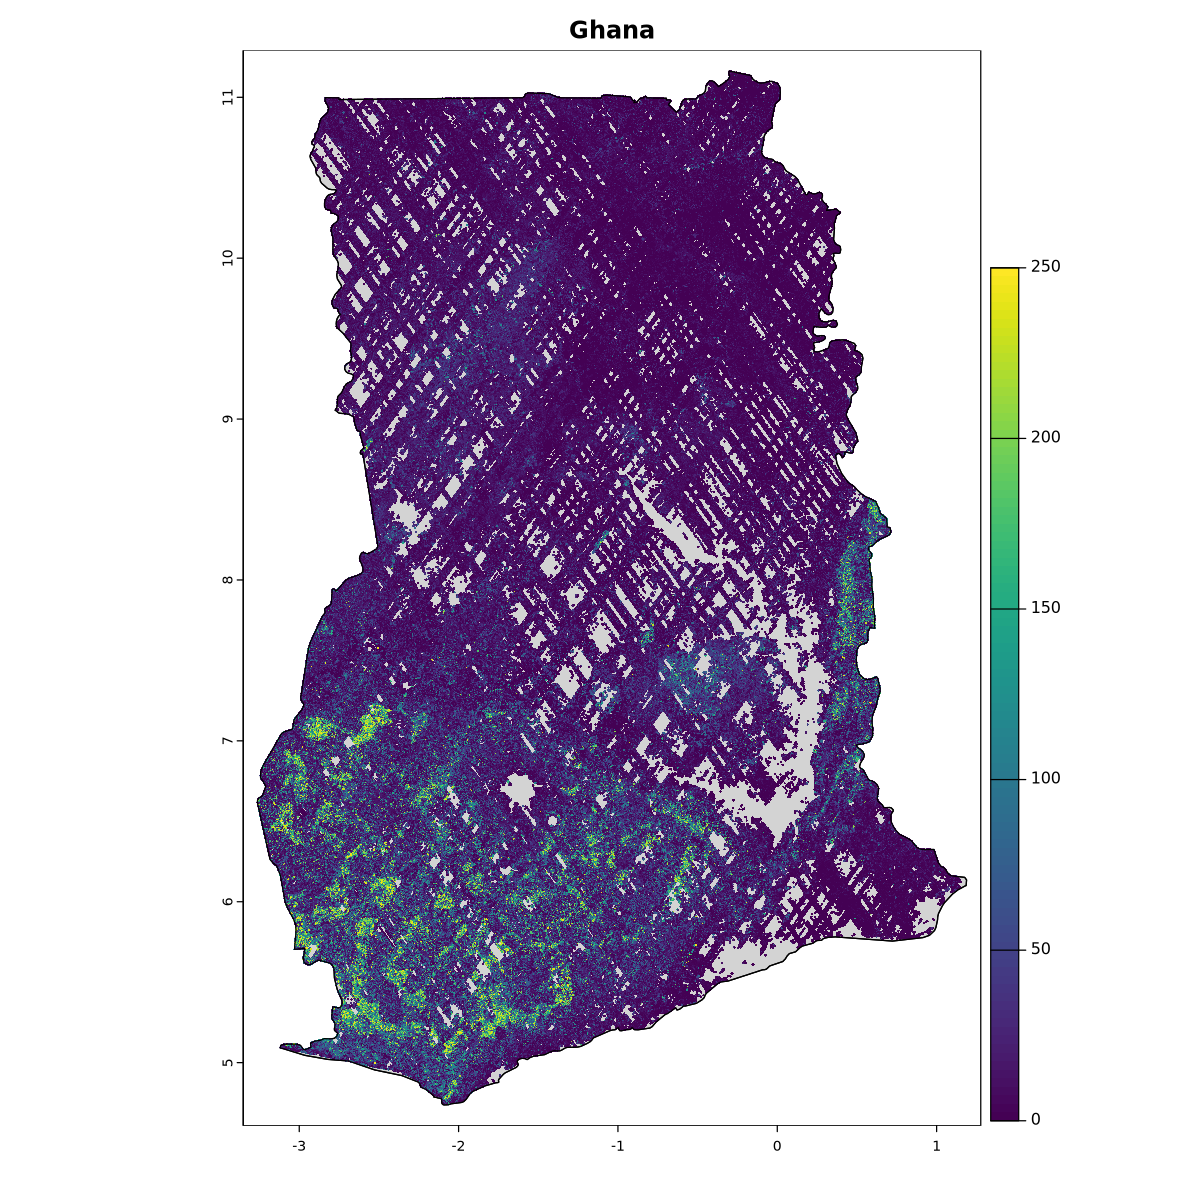

In [73]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,1))

plot(country_boundary, col="lightgray", border="black", main=country_name)

cols <- map.pal("viridis", 100)
range <- c(0,250)

if(!is.null(f.names.GS)){
    data.pts <- vect(data.GS, geom=c("lon_lowestmode", "lat_lowestmode"), crs="EPSG:4326")
    plot(data.pts, values=data.pts$AGBD, range=range, cex=0.25, add=TRUE,
     col=cols, type="continuous", legend=FALSE, 
     buffer=TRUE, decreasing=FALSE)
}
if(!is.null(f.names.DBT)){
    data.pts <- vect(data.DBT, geom=c("lon_lowestmode", "lat_lowestmode"), crs="EPSG:4326")
    plot(data.pts, values=data.pts$AGBD, range=range, cex=0.25, add=TRUE,
     col=cols, type="continuous", legend=FALSE,
     buffer=TRUE, decreasing=FALSE)
} 
if(!is.null(f.names.EBT)){
    data.pts <- vect(data.EBT, geom=c("lon_lowestmode", "lat_lowestmode"), crs="EPSG:4326")
    plot(data.pts, values=data.pts$AGBD, range=range, cex=0.25, add=TRUE,
     col=cols, type="continuous", legend=TRUE, 
     buffer=TRUE, decreasing=FALSE)
} 
plot(country_boundary, col=NA, border="black", add=T)

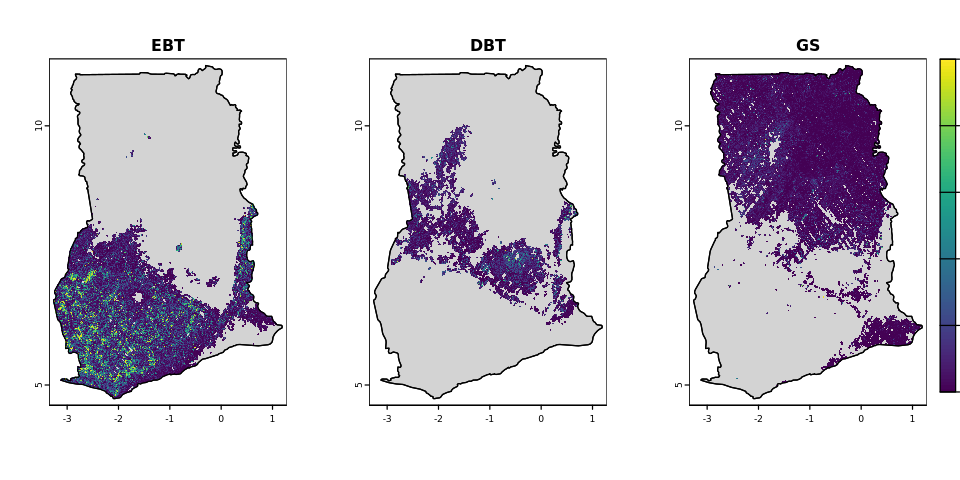

In [74]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1,3))

cols <- map.pal("viridis", 100)
range <- c(0,250)

if(!is.null(f.names.EBT)){
plot(country_boundary, col="lightgray", border="black", main="EBT")
    data.pts <- vect(data.EBT, geom=c("lon_lowestmode", "lat_lowestmode"), crs="EPSG:4326")
    plot(data.pts, values=data.pts$AGBD, range=range, cex=0.25, add=TRUE,
     col=cols, type="continuous", legend=FALSE, 
     buffer=TRUE, decreasing=FALSE)
plot(country_boundary, col=NA, border="black", add=T)
} 

if(!is.null(f.names.DBT)){
plot(country_boundary, col="lightgray", border="black", main="DBT")
    data.pts <- vect(data.DBT, geom=c("lon_lowestmode", "lat_lowestmode"), crs="EPSG:4326")
    plot(data.pts, values=data.pts$AGBD, range=range, cex=0.25, add=TRUE,
     col=cols, type="continuous", legend=FALSE, 
     buffer=TRUE, decreasing=FALSE)
plot(country_boundary, col=NA, border="black", add=T)
} 

if(!is.null(f.names.GS)){
plot(country_boundary, col="lightgray", border="black", main="GS")
    data.pts <- vect(data.GS, geom=c("lon_lowestmode", "lat_lowestmode"), crs="EPSG:4326")
    plot(data.pts, values=data.pts$AGBD, range=range, cex=0.25, add=TRUE,
     col=cols, type="continuous", legend=TRUE, 
     buffer=TRUE, decreasing=FALSE)
plot(country_boundary, col=NA, border="black", add=T)
} 


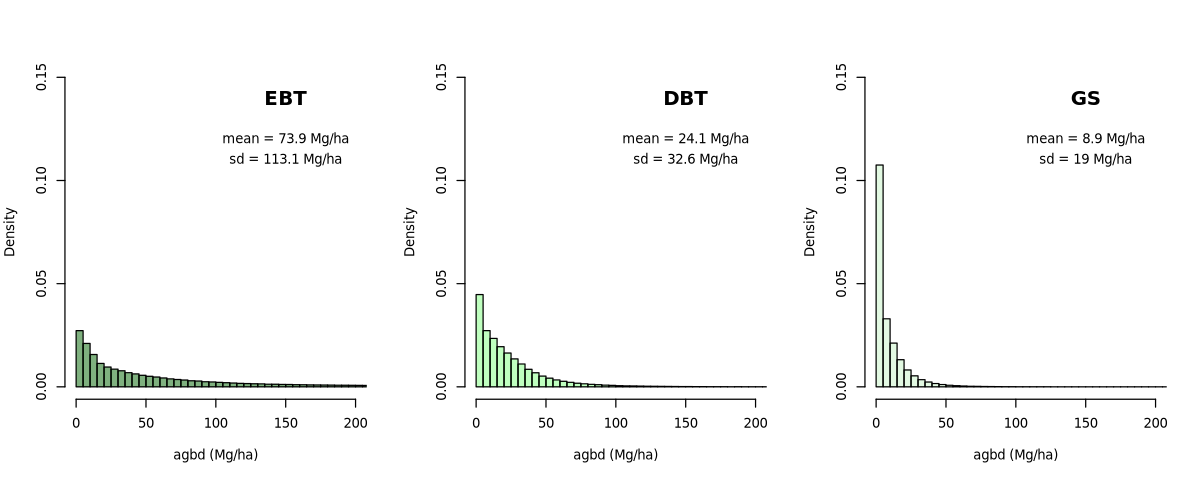

In [75]:
options(repr.plot.width=10, repr.plot.height=4)

breaks <- seq(0,5000,5)
xlim <- c(0,200)
ylim <- c(0,0.15)
xlab <- "agbd (Mg/ha)"

par(mfrow=c(1,3))
if(!is.null(data.EBT)){
hist(data.EBT$AGBD, breaks=breaks, freq=F, col=alpha("darkgreen",0.5), xlim=xlim, ylim=ylim, xlab=xlab, main="")
text(150, 0.12, paste("mean = ", round(mean(data.EBT$AGBD, na.rm=TRUE),1), " Mg/ha", sep=""))
text(150, 0.11, paste("sd = ", round(sd(data.EBT$AGBD, na.rm=TRUE),1), " Mg/ha", sep=""))
text(150, 0.14, "EBT", font=2, cex=1.5)
}
if(!is.null(data.DBT)){
hist(data.DBT$AGBD, breaks=breaks, freq=F, col=alpha("green",0.25), xlim=xlim, ylim=ylim, xlab=xlab, main="")
text(150, 0.12, paste("mean = ", round(mean(data.DBT$AGBD, na.rm=TRUE),1), " Mg/ha", sep=""))
text(150, 0.11, paste("sd = ", round(sd(data.DBT$AGBD, na.rm=TRUE),1), " Mg/ha", sep=""))    
text(150, 0.14, "DBT", font=2, cex=1.5)
}
if(!is.null(data.GS)){
hist(data.GS$AGBD, breaks=breaks, freq=F, col=alpha("lightgreen",0.25), xlim=xlim, ylim=ylim, xlab=xlab, main="")
text(150, 0.12, paste("mean = ", round(mean(data.GS$AGBD, na.rm=TRUE),1), " Mg/ha", sep=""))
text(150, 0.11, paste("sd = ", round(sd(data.GS$AGBD, na.rm=TRUE),1), " Mg/ha", sep=""))    
text(150, 0.14, "GS", font=2, cex=1.5)
}